# A simple example of lensing estimator normalization calculation
This code compute normalization of quadratic estiamtors

In [2]:
# external
import numpy as np, sys
from matplotlib.pyplot import *

In [3]:
# add path to tempura
sys.path.append("/tempura/") # example
from tempura import pytempura as cs

First define parameters

In [4]:
Tcmb  = 2.726e6    # CMB temperature
Lmax  = 3000       # maximum multipole of output normalization
lmax  = 3000
rlmin, rlmax = 100, 3000  # CMB multipole range for reconstruction
L = np.linspace(0,Lmax,Lmax+1)
l = L.copy()
Lfac = (L*(L+1.))**2/(2*np.pi)

Load arrays of lensed CMB Cls. The Cls should not be multiplied by any factors and should not have units.  

In [5]:
lcl = np.zeros((4,lmax+1)) # TT, EE, BB, TE
lcl[:,2:] = np.loadtxt('../pytempura/tests/data/cosmo2017_10K_acc3_lensedCls.dat',unpack=True,usecols=(1,2,3,4))[:,:lmax-1] 
lcl *= 2.*np.pi / (l**2+l+1e-30) / Tcmb**2

Define observed CMB cls. Here, no CMB noise.

In [6]:
ocl = lcl*1. # observed Cl (here, no CMB noise)

### Compute normalization

QDO below specifies which normalizations will be computed: TT, TE, EE, TB, EB, BB (currently BB is ignored even if you set True)

MV is also automatically computed from these specified estimators

In [7]:
QDO = [True,True,True,True,True,False] # this means that TT, TE, EE, TB and EB are used for MV estimator

"Wg" ("Wc") below is the optimal weight for constructing the MV estimator; $$\phi^{MV} = A^{MV}\sum_q W_q \phi^q$$ where $W$ is Wg (Wc) and $q = TT, TE, \dots$. 
BB is not output, and the array has 6 normalizations (TT, TE, EE, TB, EB and MV)

In [8]:
Ag, Ac, Wg, Wc = cs.norm_lens.qall(QDO,Lmax,rlmin,rlmax,lcl,ocl)

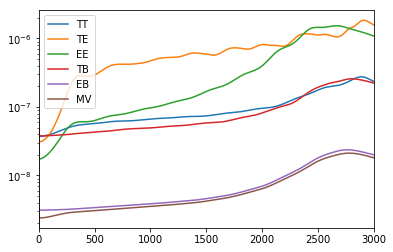

In [18]:
# plot spectra (gradient)
xlim(2,Lmax)
#xscale('log')
yscale('log')
for i, q in enumerate(['TT','TE','EE','TB','EB','MV']):
    plot(L,Lfac*Ag[i],label=q)
legend()
show()